# N皇后

**题目来源：力扣（LeetCode）**

**链接：https://leetcode-cn.com/problems/n-queens/**

## 一、题目

n 皇后问题研究的是如何将 n 个皇后放置在 n×n 的棋盘上，并且使皇后彼此之间不能相互攻击。

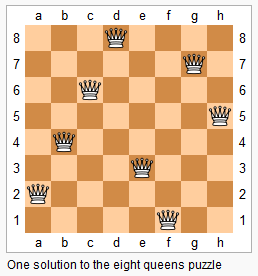

上图为 8 皇后问题的一种解法。

给定一个整数 n，返回所有不同的 n 皇后问题的解决方案。

每一种解法包含一个明确的 n 皇后问题的棋子放置方案，该方案中 'Q' 和 '.' 分别代表了皇后和空位。

## 二、示例

输入: 4

输出: 
```
[
 [".Q..",  // 解法 1
  "...Q",
  "Q...",
  "..Q."],

 ["..Q.",  // 解法 2
  "Q...",
  "...Q",
  ".Q.."]
]
```
解释: 4 皇后问题存在两个不同的解法。


## 三、解题思路

若在棋盘上已放置一个皇后，它实际占据了哪些位置？

以这个皇后为中心，上、下、左、右、左上、左下、右上、右下八个方向的位置全部被占据。

**思考：**

若在棋盘上放置一个皇后以后，如下图，标记为红色的位置即不可再放其他皇后了，如何设计算法与数据储存，实现这一功能。

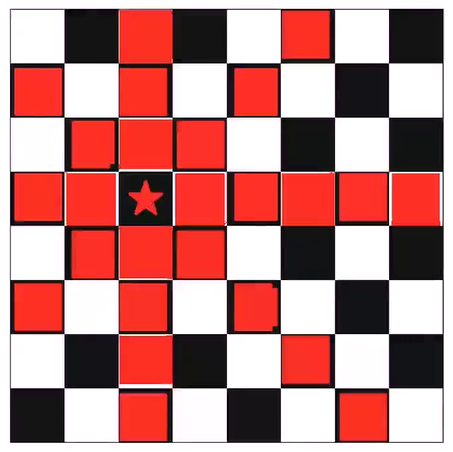

### 一、简单回溯法（超时）

递归尝试向每一个可下入Queen的位置下入Queen

In [3]:
import copy
def solveNQueens(n):
    # 放下Q，且将无法再放Q的位置用"."占住
    def put_down_Queen(board, row, col):
        for x in range(n):
            for y in range(n):
                if x == row:
                    board[x][y] = '.'
                if y == col:
                    board[x][y] = '.'
                if abs(row - x) == abs(col - y):
                    board[x][y] = '.'
        board[row][col] = 'Q'
    def generate(item, i, result):
        if i == n:
            board = ["".join(row) for row in item]
            # 会出现重复
            if board not in result:
                result.append(board)
            return
        for row in range(n):
            for col in range(n):
                if item[row][col] == ' ':
                    tmp = copy.deepcopy(item)
                    put_down_Queen(tmp, row, col)
                    generate(tmp, i + 1, result)
    result = []
    item = [[' ' for j in range(n)] for i in range(n)]
    generate(item, 0, result)
    return result

In [4]:
solveNQueens(4)

[['.Q..', '...Q', 'Q...', '..Q.'], ['..Q.', 'Q...', '...Q', '.Q..']]

### 二、优化回溯尝试位置

在上一个方法中我们简单的尝试每个位置是否能下入Queen。

这种情况下会出现很多重复的情况，例如第1个Queen尝试一行的某个位置，如果可以其在第二到n行都会有一个Queen，如果我们第一个Queen下入这些位置就可能会重复。

且尝试每个位置会导致递归次数过多，时间复杂度高。

优化点：

根据规则每行只能有一个Queen，那么我们就采取一个下入第一行，第二个下入第二行，一次类推。

In [5]:
import copy
def solveNQueens(n):
    # 放下Q，且将无法再放Q的位置用"."占住
    def put_down_Queen(board, row, col):
        for x in range(n):
            for y in range(n):
                if x == row:
                    board[x][y] = '.'
                if y == col:
                    board[x][y] = '.'
                if abs(row - x) == abs(col - y):
                    board[x][y] = '.'
        board[row][col] = 'Q'
    def generate(item, i, result):
        if i == n:
            result.append(["".join(row) for row in item])
            return
        for col in range(n):
            # 第n个Queen只尝试第n行，可降低递归次数，也不会产生重复
            if item[i][col] == ' ':
                tmp = copy.deepcopy(item)
                put_down_Queen(tmp, i, col)
                generate(tmp, i + 1, result)
    result = []
    item = [[' ' for j in range(n)] for i in range(n)]
    generate(item, 0, result)
    return result

In [6]:
solveNQueens(4)

[['.Q..', '...Q', 'Q...', '..Q.'], ['..Q.', 'Q...', '...Q', '.Q..']]